In [1]:
#Topic 2 Mixed Nash Eqm Convergence
import random
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy #to solve equation
from sympy import *

student_id = 1530
birth_month = 4
birth_day = 6

In [2]:
#Setup the game
#choices
strset_bat = [0,1] #0 for L and 1 for R
strset_pit = [0,1] #0 for L and 1 for R
#Generate the payoff matrix based on student inputs
a0 = round(0.01 + int(str(student_id)[0])*0.05,2)
a1 = round(0.51 + int(str(student_id)[1])*0.05,2)
b0 = round(1 - a0,2)
b1 = round(1 - a1,2)
#payoff matrix
# --------- payoff matrix has 2 equilibria (equal values) ------#
paymat_bat = [[a0,a1],[b0,b1]]
paymat_pit = [ [1-paymat_bat[bat_hand][pit_hand] for bat_hand in strset_bat] for pit_hand in strset_pit]
#Define the Player Class
class Player():
    rev_prob = 0.01 #prob to receive revision opportunity
    def __init__(self,hand):
        self.hand = hand
    def best_resp(self,payVec):
        if random.uniform(0,1) < self.rev_prob: #Then the agent gets a revision opportunity
            if payVec[self.hand] != max(payVec): #if the payoff vector is not maximum
                self.hand = np.argmax(payVec) #change to the action [index] that has the maximum payoff vec
#Batter 
class Batter(Player):
    @classmethod
    def pay_vec(cls,prop1Pit): #cal his payoff based on pit's prob1
        return [(1-prop1Pit)*paymat_bat[bat_hand][0] + prop1Pit*paymat_bat[bat_hand][1] for bat_hand in strset_bat]
#Pitcher
class Pitcher(Player):
    @classmethod
    def pay_vec(cls,prop1Bat):
        return [(1-prop1Bat)*paymat_pit[pit_hand][0] + prop1Bat*paymat_pit[pit_hand][1] for pit_hand in strset_pit]

#Fn to calculate the prop of right-handed batters & pitchers (1,1)
def prop1(pop_players):
    hands_list = [player.hand for player in pop_players]
    return hands_list.count(1)/len(hands_list)

#Calculate mixed str Nash eqm
def fn_nashMSE(paymat_bat,paymat_pit):
    paymat_bat = np.array(paymat_bat)
    paymat_pit = np.array(paymat_pit)
    #convert payoff matrix to sy.Matrix format
    bat_payoff = sy.Matrix(paymat_bat)
    pit_payoff = sy.Matrix(paymat_pit)
    #b for prob1 bat, p for prob1 pit. Need to solve b and p
    b = sy.Symbol('b')
    p = sy.Symbol('p')
    #prob matrix for batters and pitchers
    bat_prob = sy.Matrix([1-b,b])
    pit_prob = sy.Matrix([1-p,p])
    #calculate expected payoff for batters and pitchers (based on the other's prob matrix)
    bat_exp = bat_payoff*pit_prob #-> 2x1 matrix A(p)
    pit_exp = pit_payoff*bat_prob #-> 2x1 matrix B(b)
    #Solving for b. A[0] should = A[1]
    bat_nash = solve(bat_exp[0] - bat_exp[1],p)
    pit_nash = solve(pit_exp[0] - pit_exp[1],b)
    return pit_nash,bat_nash

print(f'Batter payoff matrix: {paymat_bat} \nPicher payoff matrix {paymat_pit}')
#Find Nash mixed strategy Eqm
pit_nash, bat_nash = fn_nashMSE(paymat_bat, paymat_pit)
print(f'Mixed Strategy Nash equilibrium: [prop1Bat, prop1Pit] = {pit_nash,bat_nash}')


Batter payoff matrix: [[0.06, 0.76], [0.94, 0.24]] 
Picher payoff matrix [[0.94, 0.06000000000000005], [0.24, 0.76]]
Mixed Strategy Nash equilibrium: [prop1Bat, prop1Pit] = ([0.500000000000000], [0.628571428571429])


In [3]:
#Generate initial population and parameters
#batters population
num_bat = 1000
init_prop1Bat = 0.08*birth_month
init_num1Bat = round(init_prop1Bat*num_bat)
batters_list = [Batter(1) for i in range(init_num1Bat)]+[Batter(0) for i in range(num_bat - init_num1Bat)]
init_prop1Bat = prop1(batters_list)

#pitcher population
num_pit = 1000
init_prop1Pit = 0.03*birth_day
init_num1Pit = round(init_prop1Pit*num_pit)
pitchers_list = [Pitcher(1) for i in range(init_num1Pit)]+[Pitcher(0) for i in range(num_pit - init_num1Pit)]
init_prop1Pit = prop1(pitchers_list)

#parameters
end_time = 1000 #no of iteration
hist_prop1Bat = []
hist_prop1Pit = []

print(f'Initial Prop: {init_prop1Bat}, {init_prop1Pit}')

Initial Prop: 0.32, 0.18


In [4]:
#Dynamics
for time in range(end_time):
    #Update the payoff vector for each type of players
    current_prop1Bat = prop1(batters_list)
    current_prop1Pit = prop1(pitchers_list)
    #Update the history of proportion of RH batters & pitchers
    hist_prop1Bat.append(current_prop1Bat)
    hist_prop1Pit.append(current_prop1Pit)
    #Update new payoff vector
    current_payVecBat = Batter.pay_vec(current_prop1Pit) #do not mistake for prop1Bat
    current_payVecPit = Pitcher.pay_vec(current_prop1Bat)
    #Revise str according to best response
    for batter in batters_list:
        batter.best_resp(current_payVecBat)
    for pitcher in pitchers_list:
        pitcher.best_resp(current_payVecPit)


Conclusion: 
 The simulation of the evolution seems to converge 
 towards the mixed strategy Nash equilirbium


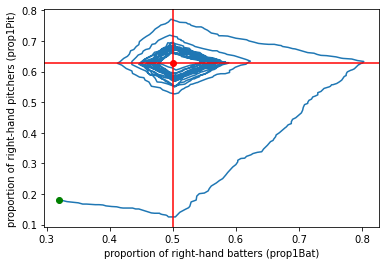

In [5]:
#Plot
plt.plot(hist_prop1Bat, hist_prop1Pit)
plt.xlabel('proportion of right-hand batters (prop1Bat)')
plt.ylabel('proportion of right-hand pitchers (prop1Pit)')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.axvline(x=pit_nash, color='red')
plt.axhline(y=bat_nash, color='red')
#plt.annotate('mixed strategy \n Nash eqm', xy = (.2,.65), color='red')
plt.plot(float(pit_nash[0]), float(bat_nash[0]), 'ro')
plt.plot(init_prop1Bat, init_prop1Pit, marker = 'o', color='green', label='initial prop')
print(f'Conclusion: \n The simulation of the evolution seems to converge \n towards the mixed strategy Nash equilirbium')

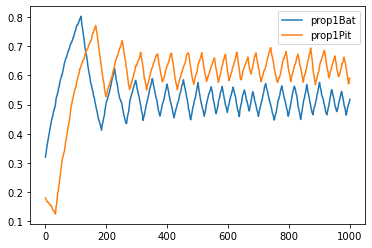

In [6]:
plt.plot(hist_prop1Bat) 
plt.plot(hist_prop1Pit)
plt.legend(['prop1Bat','prop1Pit'])